<a href="https://colab.research.google.com/github/mzs0153/ELEC-7970-Reinforcement-Learning/blob/main/Q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Taxi-v3 Environment from OpenAI gym

In [67]:
import gym
import numpy as np
env = gym.make("Taxi-v3")
state = env.reset()
print(state)
env.render()

73
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [68]:
n_states = env.observation_space.n
n_actions = env.action_space.n

# Epsilon-Greedy Policy

In [69]:
def eps_greedy(Q, eps):
  p = np.random.random()
  if (p < eps):
    return env.action_space.sample()
  else:
    return np.argmax(Q)

In [178]:
Q= np.zeros([n_states, n_actions])
alpha = 0.6
gamma=0.9
episodes = 50000
eps=0.1
RewardTracker=[]
TimeStepTracker=[]
for episode in range(episodes):
    Termination = False
    G, reward = 0,0
    state = env.reset() #Initialize the state S 
    t=0
    while Termination != True:
        t+=1
        action=eps_greedy(Q[state], eps) #Choose action A from S using policy derived from Q value. (epsilon-greedy approach)
        state2, reward, done, _ = env.step(action) #Take Action A and Observe the next state S' and reward
        G+=reward 
        #Update Q value ????
        Q[state, action]=Q[state, action]+alpha*(reward+gamma*np.max(Q[state2])-Q[state, action])
        state =state2 #Assign the next state
        if (done):
          Termination=True
    RewardTracker.append(G)
    TimeStepTracker.append(t)

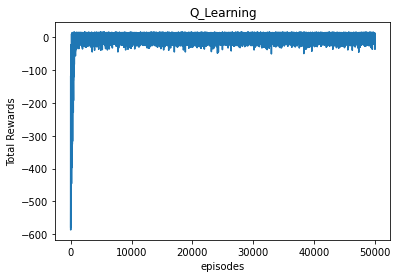

In [176]:
import matplotlib.pyplot as plt
plt.plot(RewardTracker)
plt.xlabel('episodes')
plt.ylabel('Total Rewards')
plt.title('Q_Learning')
plt.savefig('Q_learningReward.pdf')

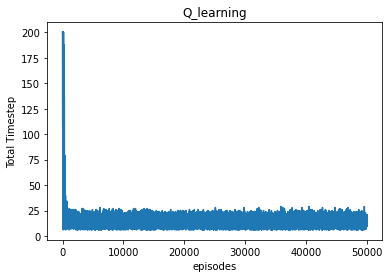

In [173]:
plt.plot(TimeStepTracker)
plt.xlabel('episodes')
plt.ylabel('Total Timestep')
plt.title('Q_learning')
plt.savefig('Q_learningTime.pdf')

# Evaluating Q-Learning Agent's Performance

In [179]:
episodes=50000
RewardTracker=[]
TimeStepTracker=[]
for episode in range(episodes):
    Termination = False
    G, reward = 0,0
    iteration=0
    s=env.reset()
    while Termination != True:
        iteration+=1
        a=np.argmax(Q[s])
        s, reward, done, _ = env.step(a) 
        G+=reward
        if (done):
          Termination=True
    RewardTracker.append(G)
    TimeStepTracker.append(iteration)
print('Average Sum of Rewards: {}'.format(sum(RewardTracker)/len(RewardTracker)))
print('Average Timesteps Taken: {}'.format(sum(TimeStepTracker)/len(TimeStepTracker)))

Average Sum of Rewards: 7.91798
Average Timesteps Taken: 13.08202
